In [13]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# load dataset
data = load_breast_cancer()

# create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# display first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
# separate features and target
X = df.drop('target', axis = 1)
y = df['target']

# split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
# standardize features by scaling mean = 0 and variance = 1
scaler = StandardScaler()

# use scaler.fit_transform() first to compute mean and variance for scaling (feed to the StandardScaler object)
# use scaler.transform() to scale the data using parameters computed in the previous step
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## First model
Architecture of the network:
- Input layer: 16 neurons
- Hidden layer: 8 neurons with relu activation
- Output layer: 1 neuron (binary classification) using sigmoid activation


In [31]:
# initialize model
model = Sequential()
model.add(Dense(16, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# train model on training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7196 - accuracy: 0.5363 - val_loss: 0.6530 - val_accuracy: 0.6316
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.7077 - val_loss: 0.5750 - val_accuracy: 0.7632
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.8066 - val_loss: 0.5074 - val_accuracy: 0.8246
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.8462 - val_loss: 0.4371 - val_accuracy: 0.8684
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8791 - val_loss: 0.3673 - val_accuracy: 0.9035
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8945 - val_loss: 0.3030 - val_accuracy: 0.9298
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.9121 - val_loss: 0.2510 - val_accuracy: 0.9474
Epoch 8/50
15/15 [==

In [33]:
# evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4/4 [==============================] - 0s 689us/step - loss: 0.0554 - accuracy: 0.9825
Test Loss: 0.055405568331480026
Test Accuracy: 0.9824561476707458


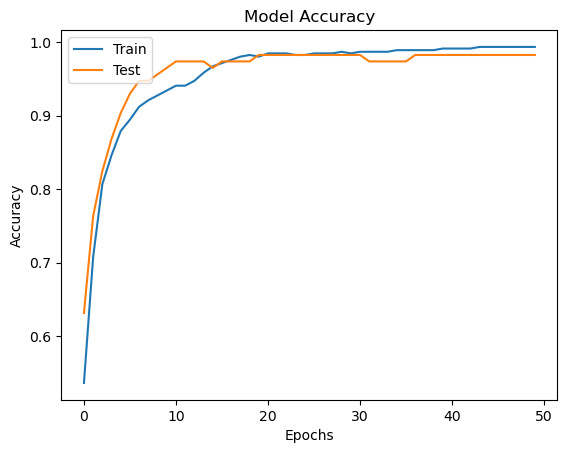

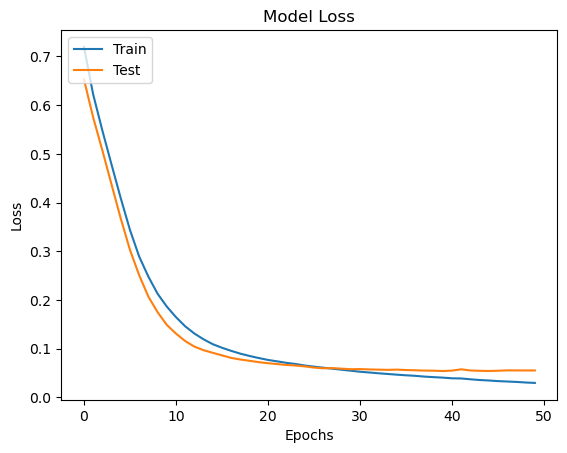

In [34]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# loss: compares predictions to actual labels
# accuracy: percentage (number) of correct predictions


In [35]:
# get predictions (thresholded at 0.5 for binary classification)
# .astype("int32") converts boolean values to 0 and 1
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

4/4 [==============================] - 0s 533us/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[42  1]
 [ 1 70]]


## second model
- number of layers

Epoch 1/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6116 - accuracy: 0.5582 - val_loss: 0.5848 - val_accuracy: 0.6579
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.8088 - val_loss: 0.5362 - val_accuracy: 0.8684
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8879 - val_loss: 0.4922 - val_accuracy: 0.9035
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.9363 - val_loss: 0.4439 - val_accuracy: 0.9386
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.9516 - val_loss: 0.3819 - val_accuracy: 0.9561
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.9626 - val_loss: 0.3092 - val_accuracy: 0.9386
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.9626 - val_loss: 0.2404 - val_accuracy: 0.9561
Epoch 8/50
15/15 [==

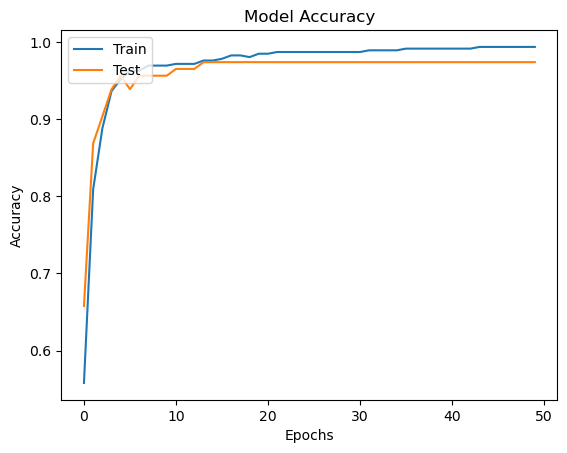

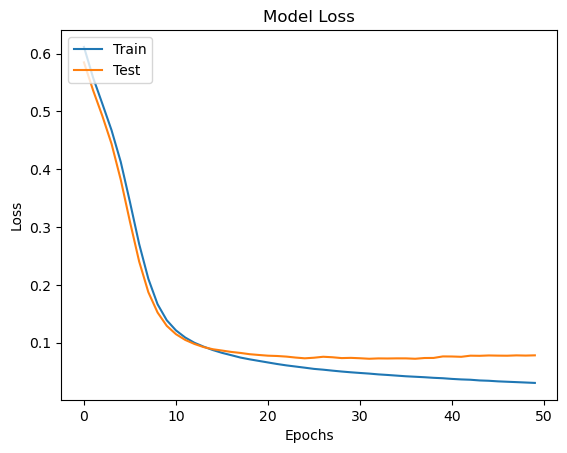

4/4 [==============================] - 0s 571us/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[42  1]
 [ 2 69]]


In [26]:
# load dataset
data = load_breast_cancer()

# create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# display first few rows
df.head()
X = df.drop('target', axis=1)  # Features (drop target column)
y = df['target']  # Target (labels)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features by scaling them to have mean = 0 and variance = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the model
model = Sequential()

# Add the first hidden layer with 16 neurons, using ReLU activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Add the second hidden layer with 8 neurons, using ReLU activation
model.add(Dense(8, activation='relu'))

# Add the output layer with 1 neuron (binary classification), using sigmoid activation
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Get predictions (thresholded at 0.5 for binary classification)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
